# Bank Customers Churn Analysis

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.


ML classification algorithms that I used to predict the target variable:

- Support Vector Machine (SVM)
- Random Forest
- Logistic Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Data Exploration

In [2]:
df = pd.read_csv('/Users/szymonduranowski/Downloads/Churn_Modelling.csv', index_col='RowNumber')
df.head(n=5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Breaking Geography column into three different columns with a binary variables.

In [3]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
geo_dummies = pd.get_dummies(prefix='Geo',data=df,columns=['Geography'])
geo_dummies.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [6]:
ready_df = geo_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})
ready_df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


0    7963
1    2037
Name: Exited, dtype: int64

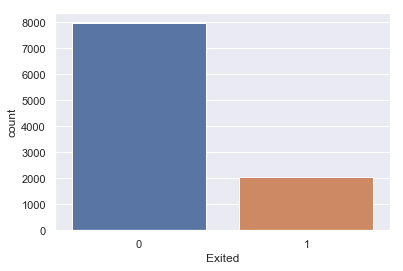

In [7]:
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=ready_df)
df.loc[:,'Exited'].value_counts()

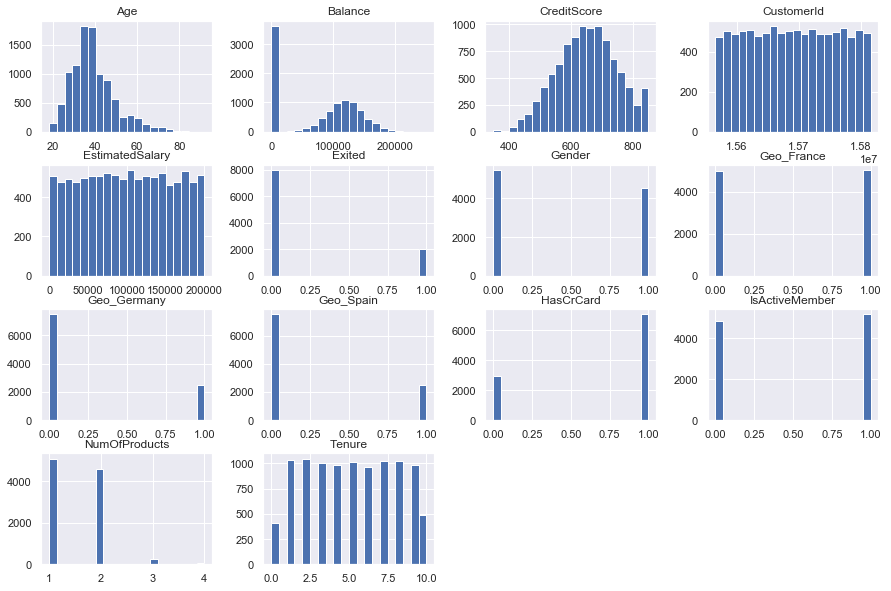

In [8]:
ready_df.hist(figsize=(15,10), bins=20)
plt.show()

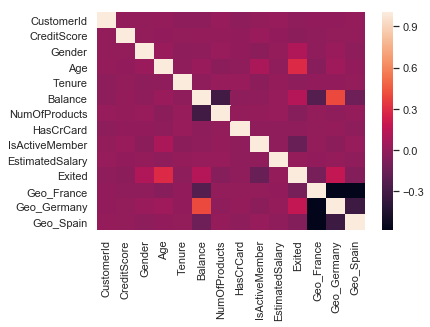

In [9]:
plt.figure()
sns.heatmap(ready_df.corr()) 

In [10]:
ready_df = ready_df.drop(['CustomerId','Surname'], axis=1)


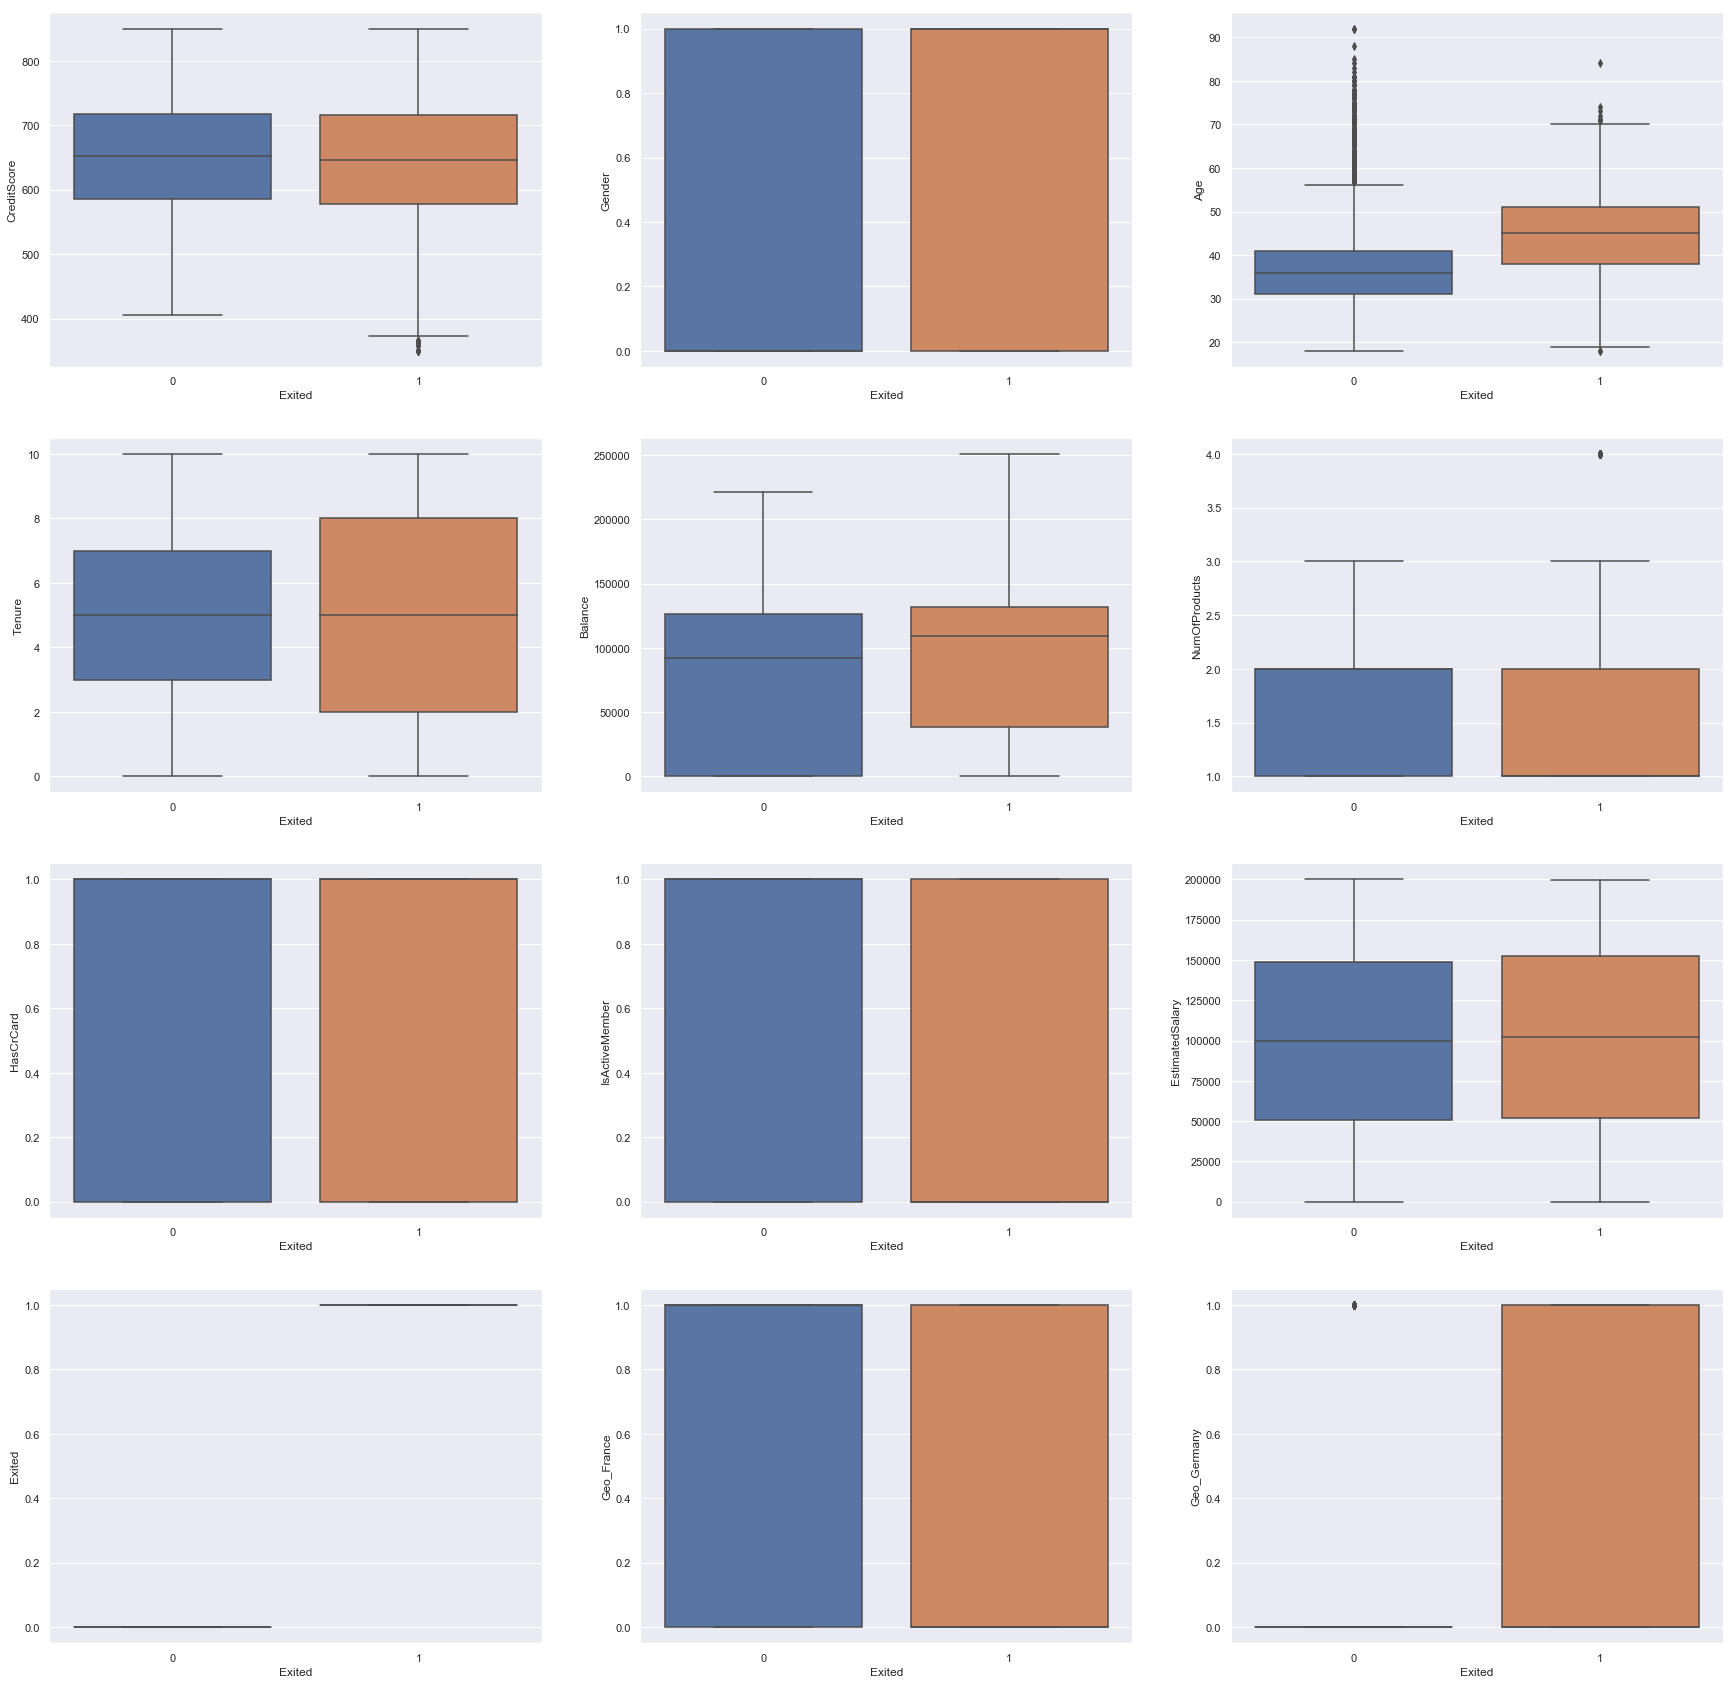

In [11]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(ready_df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = ready_df['Exited'], y = ready_df[ready_df.columns[i]],ax = axes)
    col += 1
plt.show()

In [12]:
y = ready_df.Exited.values
x_df = ready_df.drop(['Exited'], axis=1)
x_df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


# 2. Normalization of the data 

In [13]:
x = (x_df - np.min(x_df)) / (np.max(x_df)-np.min(x_df))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,0.538,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
2,0.516,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
3,0.304,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
4,0.698,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
5,1.000,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0


# 3. Splitting of the data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [15]:
X_train.shape, y_train.shape

((7000, 12), (7000,))

In [16]:
X_test.shape, y_test.shape

((3000, 12), (3000,))

# 4. Running and evaluation of classification models.

## Support Vector Machine

In [17]:
from sklearn.svm import SVC

# Defining SVM model
svm = SVC(random_state=2)

# Training model:
svm.fit(X_train, y_train)

# Predicting target values by using x_test and our model:
y_pred2 = svm.predict(X_test)

/Users/szymonduranowski/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
#Calculating score and accuracy.

from sklearn.metrics import accuracy_score

score_svm = svm.score(X_test, y_test)
acc_svm = accuracy_score(y_test, y_pred2)
print('Score:  ', score_svm)      
print('Accuracy:  ', acc_svm)

Score:   0.7983333333333333
Accuracy:   0.7983333333333333


Text(0.5, 12.5, 'Predicted label')

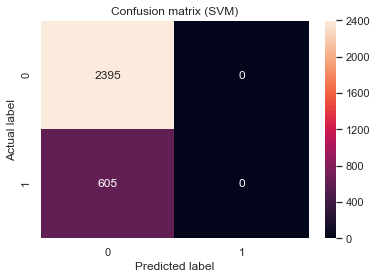

In [19]:
# Creating confusion matrix for SVM

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)

p = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g')
plt.title('Confusion matrix (SVM)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report
print('Classification report (SVM):')
print(classification_report(y_test,y_pred2))

Classification report (SVM):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2395
           1       0.00      0.00      0.00       605

   micro avg       0.80      0.80      0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.64      0.80      0.71      3000



/Users/szymonduranowski/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/szymonduranowski/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/szymonduranowski/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Defining
rf = RandomForestClassifier(n_estimators=100, random_state=4)

# Training
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

In [22]:
#Calculating score and accuracy for RF.

score_rf = rf.score(X_test, y_test)
acc_rf = accuracy_score(y_test, y_pred)
print('Score:  ', score_rf)      
print('Accuracy:  ', acc_rf)

Score:   0.859
Accuracy:   0.859


Text(0.5, 12.5, 'Predicted label')

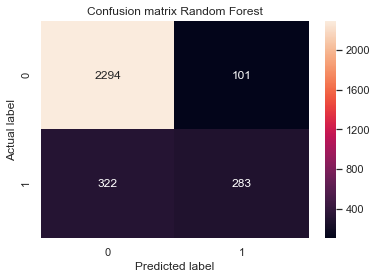

In [23]:
# Creating confusion matrix for RF

cm_2 = confusion_matrix(y_test, y_pred)

p_1 = sns.heatmap(pd.DataFrame(cm_2), annot=True, fmt='g')
plt.title('Confusion matrix Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Classification_report (Random Forest)")
print(classification_report(y_test,y_pred))

Classification_report (Random Forest)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2395
           1       0.74      0.47      0.57       605

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



## Logisitic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# Defining
lr = LogisticRegression()

# Training
lr.fit(X_train, y_train)

# Prediction
y_pred1 = lr.predict(X_test)

/Users/szymonduranowski/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
#Calculating score and accuracy for LR

score_lr = lr.score(X_test, y_test)
acc_lr = accuracy_score(y_test, y_pred1)
print('Score:  ', score_lr)  
print('Accuracy: ', acc_lr)

Score:   0.8146666666666667
Accuracy:  0.8146666666666667


Text(0.5, 12.5, 'Predicted label')

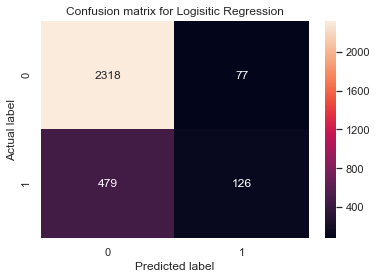

In [27]:
# Creating confusion matrix for LR

cm_3 = confusion_matrix(y_test, y_pred1)

p_1 = sns.heatmap(pd.DataFrame(cm_3), annot=True, fmt='g')
plt.title('Confusion matrix for Logisitic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print("Classification_report (Logistic Regression)")
print(classification_report(y_test,y_pred1))

Classification_report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2395
           1       0.62      0.21      0.31       605

   micro avg       0.81      0.81      0.81      3000
   macro avg       0.72      0.59      0.60      3000
weighted avg       0.79      0.81      0.78      3000



No handles with labels found to put in legend.


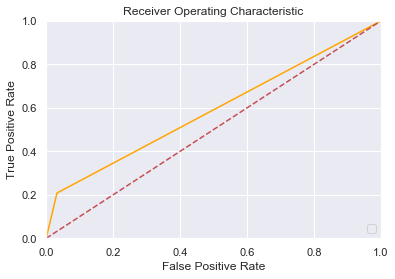

In [29]:
#Plotting Receiver Operating Characteristic curve for LR model

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   

# 5. Comparing the scores

In [30]:
ml_scores = pd.Series([score_svm, score_rf, score_lr], 
                        index=['Support Vector Machine score:', 'Random Forest score:', 'Logistic Regression score:']) 
print(ml_scores)

Support Vector Machine score:    0.798333
Random Forest score:             0.859000
Logistic Regression score:       0.814667
dtype: float64
